# Project: Indoor Navigation and Localization using Data Science

In [1]:
#All the needed libraries for the project
import pandas as pd
import numpy as np
import sys
from pandas import DataFrame
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils import shuffle
from scipy.spatial import distance
np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import h5py
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
import random

Using TensorFlow backend.


In [2]:
#Loading of the labeled data
BLE_RSSI = pd.read_csv('datasets/iBeacon_RSSI_Labeled.csv') #Labeled dataset

In [3]:
#Loading of the Unlabeled data
BLE_RSSI_UL = pd.read_csv('datasets/iBeacon_RSSI_Unlabeled.csv')#Unlabeled dataset

In [4]:
#Visulisation of first six data entries/rows in labled dataset
BLE_RSSI.head(6)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10/18/16 11:15,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10/18/16 11:15,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10/18/16 11:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10/18/16 11:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10/18/16 11:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,P01,10/18/16 11:15,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [5]:
BLE_RSSI.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


In [6]:
BLE_RSSI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
location    1420 non-null object
date        1420 non-null object
b3001       1420 non-null int64
b3002       1420 non-null int64
b3003       1420 non-null int64
b3004       1420 non-null int64
b3005       1420 non-null int64
b3006       1420 non-null int64
b3007       1420 non-null int64
b3008       1420 non-null int64
b3009       1420 non-null int64
b3010       1420 non-null int64
b3011       1420 non-null int64
b3012       1420 non-null int64
b3013       1420 non-null int64
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


In [7]:
#Visulisation of first five data entries/rows in Unlabled dataset
BLE_RSSI_UL.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,?,11-7-2016 12:29:01,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,?,11-7-2016 12:29:00,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,?,11-7-2016 12:28:59,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,?,11-7-2016 12:28:58,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,?,11-7-2016 12:28:57,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


All location entries in unleabled dataset is marked with ? intentionally to show unlabled data.

In [8]:
BLE_RSSI_UL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 15 columns):
location    5191 non-null object
date        5191 non-null object
b3001       5191 non-null int64
b3002       5191 non-null int64
b3003       5191 non-null int64
b3004       5191 non-null int64
b3005       5191 non-null int64
b3006       5191 non-null int64
b3007       5191 non-null int64
b3008       5191 non-null int64
b3009       5191 non-null int64
b3010       5191 non-null int64
b3011       5191 non-null int64
b3012       5191 non-null int64
b3013       5191 non-null int64
dtypes: int64(13), object(2)
memory usage: 608.4+ KB


In [16]:
BLE_RSSI['date'].head()

0    10/18/16 11:15
1    10/18/16 11:15
2    10/18/16 11:15
3    10/18/16 11:15
4    10/18/16 11:15
Name: date, dtype: object

In [17]:
dates = pd.to_datetime(BLE_RSSI['date'])
dates

0      2016-10-18 11:15:00
1      2016-10-18 11:15:00
2      2016-10-18 11:15:00
3      2016-10-18 11:15:00
4      2016-10-18 11:15:00
5      2016-10-18 11:15:00
6      2016-10-18 11:15:00
7      2016-10-18 11:15:00
8      2016-10-18 11:15:00
9      2016-10-18 11:15:00
10     2016-10-18 11:15:00
11     2016-10-18 11:14:00
12     2016-10-18 11:14:00
13     2016-10-18 11:14:00
14     2016-10-18 11:14:00
15     2016-10-18 11:14:00
16     2016-10-18 11:14:00
17     2016-10-18 11:14:00
18     2016-10-18 11:14:00
19     2016-10-18 11:14:00
20     2016-10-18 11:14:00
21     2016-10-18 11:14:00
22     2016-10-18 11:14:00
23     2016-10-18 11:14:00
24     2016-10-18 11:14:00
25     2016-10-18 11:14:00
26     2016-10-18 11:14:00
27     2016-10-18 11:14:00
28     2016-10-18 11:14:00
29     2016-10-18 11:14:00
               ...        
1390   2016-04-19 09:45:00
1391   2016-04-19 09:45:00
1392   2016-04-19 09:45:00
1393   2016-04-19 09:44:00
1394   2016-04-19 09:44:00
1395   2016-04-19 09:44:00
1

In [18]:
#Drop the date column
df = BLE_RSSI.drop(['date'],axis=1)
#Drop the location column
df = df.drop(['location'], axis=1)
#min-max scaling
scaled = minmax_scaling(df, columns=['b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 
                                     'b3008', 'b3009', 'b3010', 'b3011', 'b3012', 'b3013'])
#Drop the date and location column from the unlabled dataset
df_ul = BLE_RSSI_UL.drop(['date'],axis=1)
df_ul = df_ul.drop(['location'], axis=1)
#min-max scaling
scaled_ul = minmax_scaling(df_ul, columns=['b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 
                                     'b3008', 'b3009', 'b3010', 'b3011', 'b3012', 'b3013'])

In [19]:
scaled.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
scaled.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,0.016351,0.307632,0.169909,0.246288,0.154442,0.180700,0.030723,0.055761,0.019689,0.018401,0.015967,0.019759,0.027904
std,0.122249,0.427076,0.343423,0.392523,0.336970,0.359396,0.161134,0.213429,0.132139,0.127638,0.119522,0.132436,0.156411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.865248,0.000000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
scaled_ul.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0.0,0.0,0.857143,0.0,0.866197,1.000000,0.856115,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.857143,0.0,0.859155,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.850000,0.0,0.887324,0.951389,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.880282,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.830986,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
scaled_ul.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000
mean,0.151542,0.244684,0.134841,0.117878,0.295425,0.294207,0.105425,0.221045,0.111143,0.103849,0.086244,0.069944,0.084014
std,0.330817,0.391870,0.306809,0.291359,0.401544,0.399285,0.284587,0.366523,0.290358,0.274008,0.252326,0.230648,0.256314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.793478,0.000000,0.000000,0.816901,0.812500,0.000000,0.692857,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#Saperate the row and column location letters from the location column
#and add it to the scaled dataframe
scaled['col_loc'] = (BLE_RSSI['location'].str[0])
scaled['row_loc'] = (BLE_RSSI['location'].str[1:]).astype(int)
scaled.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,col_loc,row_loc
0,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O,2
1,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,1
2,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,1
3,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,1
4,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,1


In [24]:
#Custom encoders used to encode columns and rows

#custom alphabate encoder to encode column location 
alphabate_encoder = {'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5,
           'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,
           'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,
           'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,
           'Y':24,'Z':25 }

#custom number encoder to encode row location 
number_encoder = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5,
           7:6,8:7,9:8,10:9,11:10,12:11,
           13:12,14:13,15:14,16:15,17:16,18:17 }

In [28]:
#Encode both rows and column location using custom encoders 
rows = scaled.shape[0]
en_rows = []
en_cols = []
for i in range(0,rows):
    x = (scaled.iat[i, 13])
    #Custom encode columns 
    en_cols.append(alphabate_encoder[x])
    y = int(scaled.iat[i, 14])
    #Custom encode rows 
    en_rows.append(number_encoder[y])
    
#dataframe containing custom encoded colums and rows
col_row = pd.DataFrame({'en_cols': en_cols, 'en_rows': en_rows})
col_row.to_csv('datasets/col_row.csv', index=False )

#dataframe containing custom encoded colums only
col_df = pd.DataFrame({'en_cols': en_cols})
col_df.to_csv('datasets/encoded_columns.csv', index=False )

#dataframe containing custom encoded rows only
row_df = pd.DataFrame({'en_rows': en_rows})
row_df.to_csv('datasets/encoded_rows.csv', index=False )
#scaled.at[0, 'col_loc']
#scaled.add(df, axis  = 'columns')

#dataframe containing scaled labeled data from thirteen iBeacons only
BLE_df = scaled.drop('col_loc',axis =1)
BLE_df = BLE_df.drop('row_loc',axis =1)

BLE_df.to_csv('datasets/Scaled_BLE_RSSI.csv', index=False )
col_row.head()

,en_cols,en_rows
0,14,1
1,15,0
2,15,0
3,15,0
4,15,0


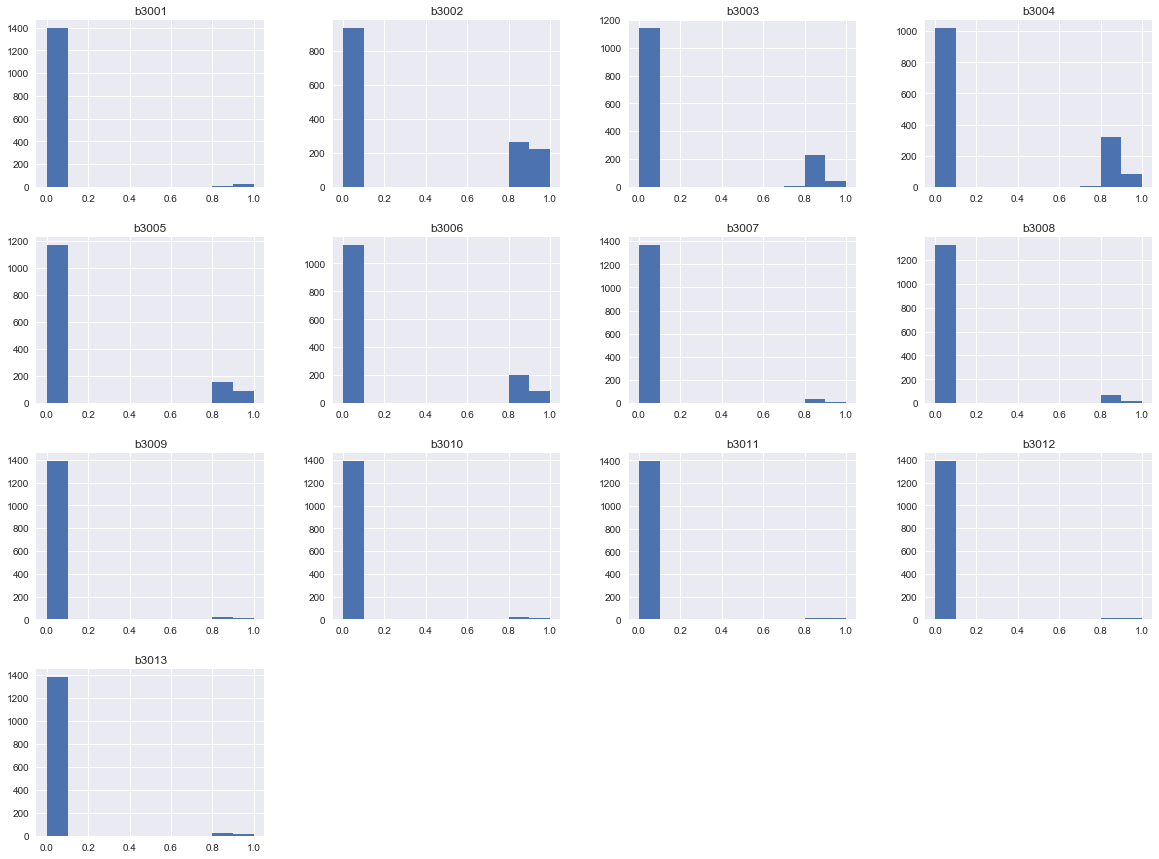

In [29]:
#Visulization of distribution of data points across different iBeacon values
BLE_df.hist(figsize=(20,15))# Plotting all the beacons values 
plt.show()

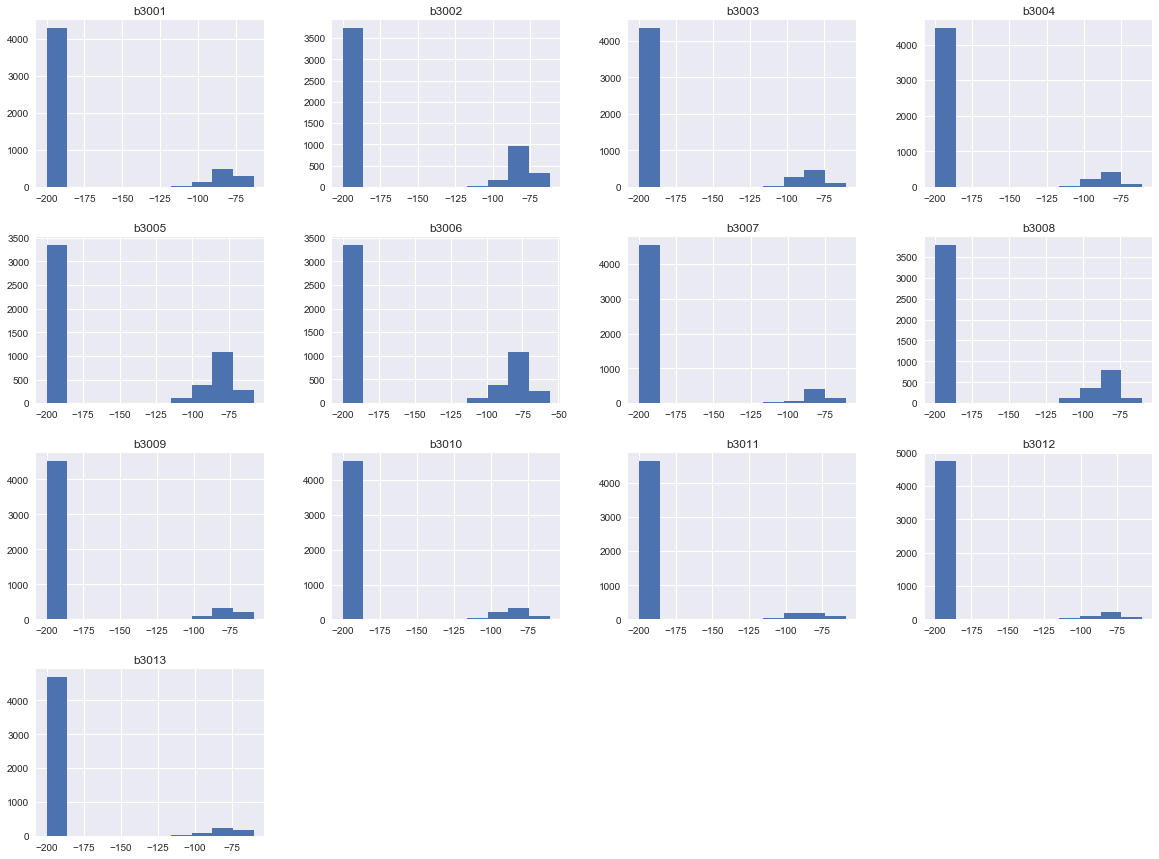

In [9]:
#Visulization of distribution of data points across different iBeacon values
BLE_RSSI_UL.hist(figsize=(20,15))# Plotting all the beacons values 
plt.show()

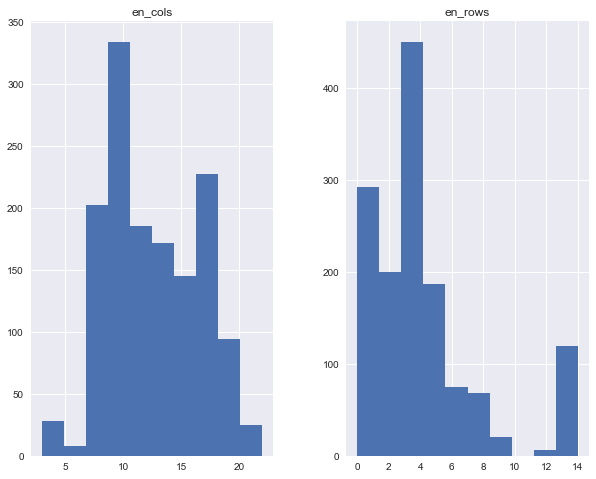

In [27]:
#Visulization of distribution of data points across rows and columns
col_row.hist(figsize=(10,8))# Plotting row column data points information
plt.show()

In [30]:
x = np.array([en_cols[0],en_rows[0]])

#array containing the location of iBeacon devices
b_loc = np.zeros((13,2))

# Approx. hard coded iBeacon locations
b_loc[0]= y_1 = np.array([5,8])
b_loc[1]= y_2 = np.array([9,3])
b_loc[2]= y_3 = np.array([13,3])
b_loc[3]= y_4 = np.array([18,3])
b_loc[4]= y_5 = np.array([9,6])
b_loc[5]= y_6 = np.array([13,6])
b_loc[6]= y_7 = np.array([18,6])
b_loc[7]= y_8 = np.array([9,9])
b_loc[8]= y_9 = np.array([3,14])
b_loc[9]= y_10 = np.array([9,14])
b_loc[10]= y_11 = np.array([13,14])
b_loc[11]= y_12 = np.array([18,14])
b_loc[12]= y_13 = np.array([22,14])
np.save('grids/iBeacon_locations_col_row.npy', b_loc) 

In [29]:
#datafram containing the distance of each iBeacon device from the encoded location of the datapoints in labeled data
col_row_dis = DataFrame()
col_row_dis = col_row.copy()
dis_ph = []
col_nms = ['dis_' + str(i) for i in range(1, 14)]
dis_df = DataFrame( )

for j in range(0,13):
    for i in range(0,1420):
        #Distace is multiplied by three due to the fact that each grid cell is approx. 3m by 3m
        dis_ph.append(3 * distance.euclidean(np.array([en_cols[i],en_rows[i]]), b_loc[j]))
    col_row_dis['dis_' + str(j+1)] = pd.DataFrame({ col_nms[j]: dis_ph})
    dis_ph.clear()
col_row_dis.to_csv('datasets/col_row_dis.csv', index=False )
col_row_dis.head()

,en_cols,en_rows,dis_1,dis_2,dis_3,dis_4,dis_5,dis_6,dis_7,dis_8,dis_9,dis_10,dis_11,dis_12,dis_13
0,14,1,34.205263,16.155494,6.708204,13.416408,21.213203,15.297059,19.209373,28.301943,51.088159,41.785165,39.115214,40.804412,45.793013
1,15,0,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
2,15,0,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
3,15,0,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
4,15,0,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428


In [41]:
#dataset containing only the distace from each iBeacon to the location of the datapoint
for j in range(0,13):
    for i in range(0,1420):
        #Distace is multiplier by three due to the fact that each grid cell is approx. 3m by 3m
        dis_ph.append(3 * distance.euclidean(np.array([en_cols[i],en_rows[i]]), b_loc[j]))
    dis_df['dis_' + str(j+1)] = pd.DataFrame({ col_nms[j]: dis_ph})
    dis_ph.clear()

dis_df.to_csv('datasets/iBeacon_Distance.csv', index=False )
dis_df.head()

,dis_1,dis_2,dis_3,dis_4,dis_5,dis_6,dis_7,dis_8,dis_9,dis_10,dis_11,dis_12,dis_13
0,34.205263,16.155494,6.708204,13.416408,21.213203,15.297059,19.209373,28.301943,51.088159,41.785165,39.115214,40.804412,45.793013
1,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
2,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
3,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
4,38.418745,20.124612,10.816654,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428


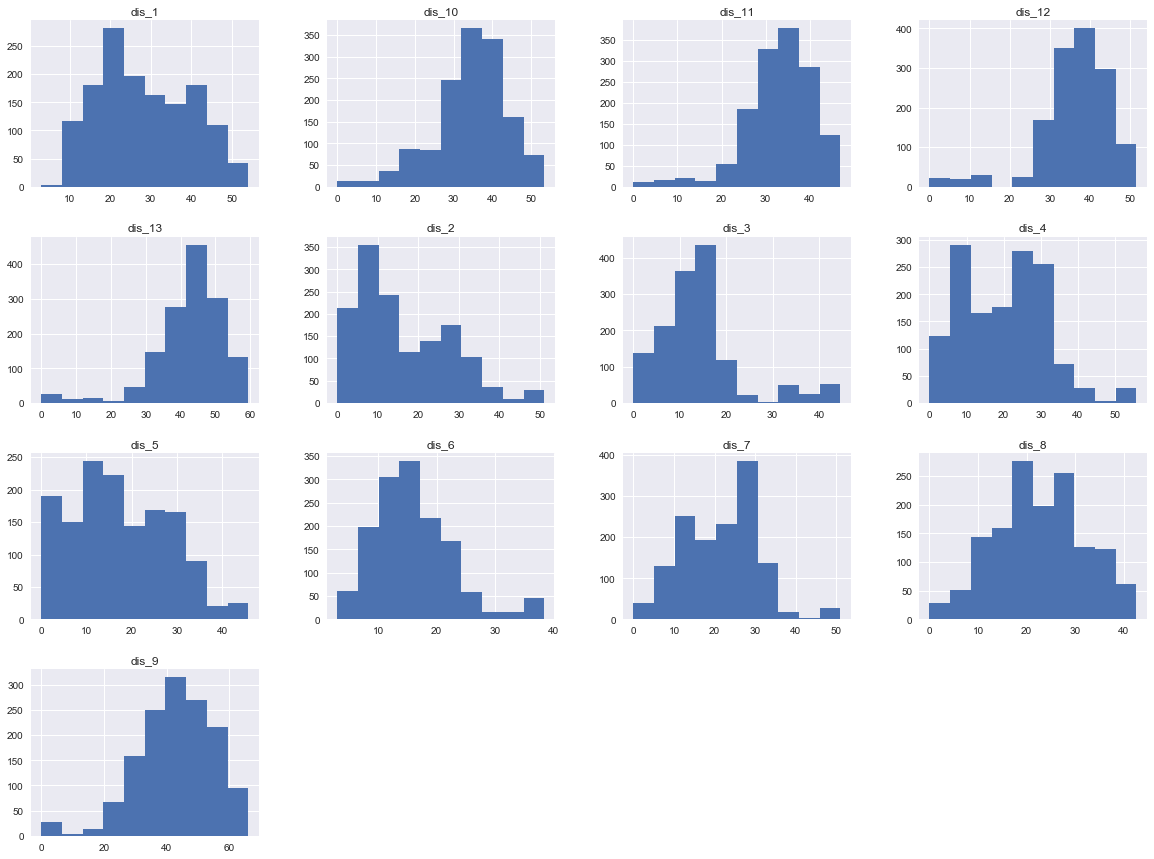

In [42]:
#Visulization of distribution of data points in the distance dataframe
dis_df.hist(figsize=(20,15))# Plotting row column data points information
plt.show()

In [30]:
#dataframe containing the both all the scaled iBeacon values and the distace from the iBeacon 
BLE_dis = BLE_df.copy()
for j in range(0,13):
    for i in range(0,1420):
        #Distace is multiplier by three due to the fact that each grid cell is approx. 3m by 3m
        dis_ph.append(3 * distance.euclidean(np.array([en_cols[i],en_rows[i]]), b_loc[j]))
    BLE_dis['dis_' + str(j+1)] = pd.DataFrame({ col_nms[j]: dis_ph})
    dis_ph.clear()
BLE_dis.to_csv('datasets/BLE_dis.csv', index=False )
BLE_dis.head(6)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,...,dis_4,dis_5,dis_6,dis_7,dis_8,dis_9,dis_10,dis_11,dis_12,dis_13
0,0.0,0.0,0.000000,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,...,13.416408,21.213203,15.297059,19.209373,28.301943,51.088159,41.785165,39.115214,40.804412,45.793013
1,0.0,0.0,0.000000,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,...,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
2,0.0,0.0,0.000000,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,...,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
3,0.0,0.0,0.000000,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,...,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
4,0.0,0.0,0.000000,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,...,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428
5,0.0,0.0,0.819444,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,12.727922,25.455844,18.973666,20.124612,32.449961,55.317267,45.694639,42.426407,42.953463,46.957428


In [31]:
#dataframe containing the scaled iBeacon values along with encoded col and row locations for unlabeled dataset
BLE_col_row = BLE_df.copy()
BLE_col_row['col'] = col_df
BLE_col_row['row'] = row_df
BLE_col_row.to_csv('datasets/BLE_col_row.csv', index=False)
list1 = []
BLE_UL_col_row = scaled_ul.copy()
for i in range(0,scaled_ul.shape[0]):
    list1.append(-1)
BLE_UL_col_row['col'] = pd.DataFrame({ 'col': list1})
BLE_UL_col_row['row'] = pd.DataFrame({ 'row': list1})
BLE_UL_col_row.to_csv('datasets/BLE_UL_col_row.csv', index=False)
BLE_col_row.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,col,row
0,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,1
1,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0
2,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0
3,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0
4,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0


In [21]:
BLE_UL_col_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 15 columns):
b3001    5191 non-null float64
b3002    5191 non-null float64
b3003    5191 non-null float64
b3004    5191 non-null float64
b3005    5191 non-null float64
b3006    5191 non-null float64
b3007    5191 non-null float64
b3008    5191 non-null float64
b3009    5191 non-null float64
b3010    5191 non-null float64
b3011    5191 non-null float64
b3012    5191 non-null float64
b3013    5191 non-null float64
col      5191 non-null int64
row      5191 non-null int64
dtypes: float64(13), int64(2)
memory usage: 608.4 KB


In [35]:
#create a 2D array that represents the grid 
total_cols = 23
total_rows = 18
grid = np.zeros((18, 23))

# Object placement on the grid
# The value -10 represents an object on the grid
grid[0:6,0:8] = -10
grid[:,0:2]  = -10
grid[6:9,0:2]  = 0
grid[9:13,6:8] = -10
grid[10:13,5] = -10
grid[10,16] = -10
grid[10:12,12:15]  = -10
grid[9:12,17:21]  = -10
grid[5:7,19:23] = -10
grid[1:5,21:23] = -10

np.save('grids/objects_grid.npy', grid)   

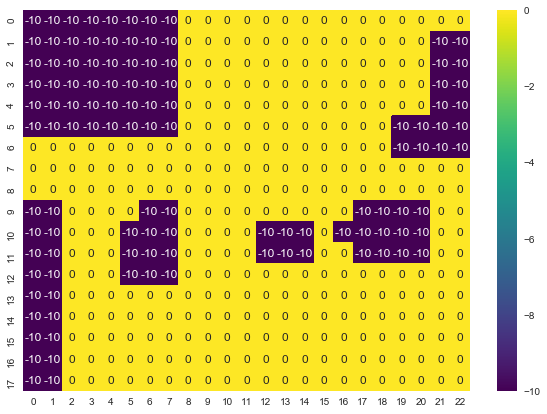

In [36]:
#plotting the grid using sns
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(grid, annot=True, fmt="g", cmap='viridis', ax=ax)
plt.show()

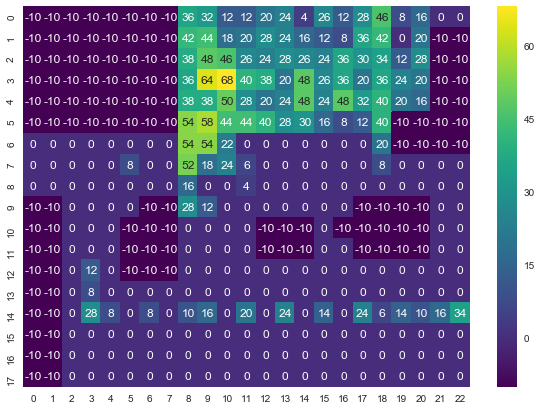

In [38]:
#Plotting the grid with the number of datapoints available in labeled dataset for each grid location
for i in range(0,rows):
    grid[col_row.iat[i,1],col_row.iat[i,0]] += 1
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(grid, annot=True, fmt="g", cmap='viridis', ax=ax)
plt.show()

In [44]:
#create a binary BLE_RSSI array in which each RSSI value grater than 0 is 1 and all the other values are 0
#the binary BLE array will be used to train a deep neural net to predict the RSSI value based on location and distance
binary_BLE = np.zeros(BLE_df.shape)
shape = BLE_df.shape
for i in range (0,shape[0]):
    for j in range (0,shape[1]):
        if (BLE_df.iat[i,j] > 0):
            binary_BLE[i,j] = 1    
np.save('datasets/binary_BLE.npy', binary_BLE) 
binary_BLE[0,:]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [45]:
#input data 
X = col_row_dis.values
#output data
y = binary_BLE

In [46]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=True)

In [47]:
#The environment model to predict the iBeacon closest to the location based on 
#the location and distace to the iBeacons from the location
env_model = Sequential()
env_model.add(Dense(30, input_dim=15, activation='relu'))
env_model.add(Dense(128, activation='relu'))
env_model.add(Dense(256, activation='relu'))
env_model.add(Dense(512, activation='relu'))
env_model.add(Dense(13, activation='sigmoid'))

env_model.summary()
env_model.save('model_weights/weights.environment.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 13)                6669      
Total params: 175,725
Trainable params: 175,725
Non-trainable params: 0
_________________________________________________________________


In [35]:
#compile the environment model
epochs = 50
env_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['top_k_categorical_accuracy','accuracy'])

checkpointer = ModelCheckpoint(filepath='model_weights/weights.environment.h5', 
                              verbose=1, save_best_only=True)


In [36]:
#train the model
#env_model.load_weights('weights.environment.h5')
env_model.fit(X_train, y_train,validation_data=(X_test, y_test),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1) #

Train on 1349 samples, validate on 71 samples
Epoch 1/50
1349/1349 [==============================] - 1s 462us/step - loss: 0.2514 - top_k_categorical_accuracy: 0.9259 - acc: 0.9118 - val_loss: 0.1897 - val_top_k_categorical_accuracy: 0.9577 - val_acc: 0.9274

Epoch 00001: val_loss improved from inf to 0.18969, saving model to model_weights/weights.environment.h5
Epoch 2/50
1349/1349 [==============================] - 0s 322us/step - loss: 0.1596 - top_k_categorical_accuracy: 0.9830 - acc: 0.9369 - val_loss: 0.1744 - val_top_k_categorical_accuracy: 1.0000 - val_acc: 0.9112

Epoch 00002: val_loss improved from 0.18969 to 0.17439, saving model to model_weights/weights.environment.h5
Epoch 3/50
1349/1349 [==============================] - 0s 332us/step - loss: 0.1424 - top_k_categorical_accuracy: 0.9926 - acc: 0.9405 - val_loss: 0.1697 - val_top_k_categorical_accuracy: 1.0000 - val_acc: 0.9296

Epoch 00003: val_loss improved from 0.17439 to 0.16970, saving model to model_weights/weights.e

In [40]:
#Train the variational encoder model with the scaled RSSI data
from VAE import VAE

X = pd.read_csv('datasets/Scaled_BLE_RSSI.csv')
y = pd.read_csv('datasets/encoded_columns.csv')
vae_model = VAE(X.shape[1])
y.shape

(1420, 1)

In [41]:
#devide the data for testing and training
#y1 = keras.utils.to_categorical(y, num_classes=total_cols)
#x = np.load('datasets/binary_BLE.npy')
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, shuffle=True)
tt = y_train
zz = y_test
y_train = keras.utils.to_categorical(tt , num_classes=total_cols)
y_test = keras.utils.to_categorical(zz, num_classes=total_cols)
y_train.shape

(1065, 23)

In [43]:
#compile the VAE model
batches = 20#batch size
epoch = 100#number of epochs
checkpointer = ModelCheckpoint(filepath='model_weights/weights.vae.h5', 
                              verbose=1, save_best_only=True)

vae_model.vae.compile(optimizer='adam', loss=vae_model.loss_vae)

In [44]:
#train the VAE model
vae_model.vae.fit(X_train, X_train,validation_data=(X_test, X_test), batch_size=batches, 
                  epochs=epoch,callbacks=[checkpointer], verbose=1)

Train on 1065 samples, validate on 355 samples
Epoch 1/100
1065/1065 [==============================] - 1s 698us/step - loss: 0.1220 - val_loss: 0.0741

Epoch 00001: val_loss improved from inf to 0.07408, saving model to model_weights/weights.vae.h5
Epoch 2/100
1065/1065 [==============================] - 0s 237us/step - loss: 0.0694 - val_loss: 0.0614

Epoch 00002: val_loss improved from 0.07408 to 0.06137, saving model to model_weights/weights.vae.h5
Epoch 3/100
1065/1065 [==============================] - 0s 227us/step - loss: 0.0541 - val_loss: 0.0475

Epoch 00003: val_loss improved from 0.06137 to 0.04746, saving model to model_weights/weights.vae.h5
Epoch 4/100
1065/1065 [==============================] - 0s 203us/step - loss: 0.0397 - val_loss: 0.0330

Epoch 00004: val_loss improved from 0.04746 to 0.03302, saving model to model_weights/weights.vae.h5
Epoch 5/100
1065/1065 [==============================] - 0s 230us/step - loss: 0.0294 - val_loss: 0.0283

Epoch 00005: val_loss i

1065/1065 [==============================] - 0s 225us/step - loss: 0.0150 - val_loss: 0.0155

Epoch 00047: val_loss did not improve
Epoch 48/100
1065/1065 [==============================] - 0s 213us/step - loss: 0.0144 - val_loss: 0.0152

Epoch 00048: val_loss did not improve
Epoch 49/100
1065/1065 [==============================] - 0s 243us/step - loss: 0.0148 - val_loss: 0.0154

Epoch 00049: val_loss did not improve
Epoch 50/100
1065/1065 [==============================] - 0s 233us/step - loss: 0.0148 - val_loss: 0.0155

Epoch 00050: val_loss did not improve
Epoch 51/100
1065/1065 [==============================] - 0s 235us/step - loss: 0.0145 - val_loss: 0.0153

Epoch 00051: val_loss did not improve
Epoch 52/100
1065/1065 [==============================] - 0s 236us/step - loss: 0.0144 - val_loss: 0.0151

Epoch 00052: val_loss improved from 0.01515 to 0.01514, saving model to model_weights/weights.vae.h5
Epoch 53/100
1065/1065 [==============================] - 0s 234us/step - loss: 

In [45]:
#testing of the model
x = x = np.array([0.0,0.6,0.0,0.0,0.0,0.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(-1,13)
vae_model.vae.predict(x)

array([[  1.22240408e-05,   7.67572224e-01,   6.65617809e-02,
          3.49267611e-05,   3.47130746e-03,   8.67386058e-04,
          5.86303067e-04,   5.93868159e-02,   1.03502418e-03,
          3.13355587e-02,   8.40592489e-04,   9.04102926e-04,
          3.91140813e-04]], dtype=float32)

In [46]:
vae_model.vae.load_weights('model_weights/weights.vae.h5')
#vae_model.vae.trainable = False
#vae_model.encoder.trainable = False
#vae_model.decoder.trainable = False
vae_model.stddev = 1.0
y.shape

(1420, 1)

In [55]:
#predicting the columns using the VAE model with the output being the column 
vae_model_2 = VAE(X.shape[1])
l = vae_model_2.vae.output
l = layers.Dense(128, activation="relu",name='dense7')(l)
l.trainable = True
predictions = layers.Dense(total_cols, activation="softmax",name='column')(l)
predictions.trainable = True

# creating the final model 
col_model = models.Model(vae_model_2.vae.inputs, predictions)
col_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 13)                0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 43268     
_________________________________________________________________
decoder (Model)              (None, 13)                42765     
_________________________________________________________________
dense7 (Dense)               (None, 128)               1792      
_________________________________________________________________
column (Dense)               (None, 23)                2967      
Total params: 90,792
Trainable params: 90,792
Non-trainable params: 0
_________________________________________________________________


In [56]:
#commpile the column predicting model
batches = 20#batch size
epoch = 100#number of epochs
checkpointer = ModelCheckpoint(filepath='model_weights/weights.vae_col.h5', 
                              verbose=1, save_best_only=True)

col_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['mae', 'categorical_accuracy'])

In [57]:
#fit the model
col_model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=batches, epochs=epoch,
                callbacks=[checkpointer], verbose=1)

Train on 1065 samples, validate on 355 samples
Epoch 1/100
1065/1065 [==============================] - 1s 811us/step - loss: 2.8334 - mean_absolute_error: 0.0810 - categorical_accuracy: 0.1202 - val_loss: 2.6050 - val_mean_absolute_error: 0.0795 - val_categorical_accuracy: 0.1408

Epoch 00001: val_loss improved from inf to 2.60502, saving model to model_weights/weights.vae_col.h5
Epoch 2/100
1065/1065 [==============================] - 0s 256us/step - loss: 2.5535 - mean_absolute_error: 0.0785 - categorical_accuracy: 0.1286 - val_loss: 2.4641 - val_mean_absolute_error: 0.0774 - val_categorical_accuracy: 0.1408

Epoch 00002: val_loss improved from 2.60502 to 2.46414, saving model to model_weights/weights.vae_col.h5
Epoch 3/100
1065/1065 [==============================] - 0s 259us/step - loss: 2.3774 - mean_absolute_error: 0.0764 - categorical_accuracy: 0.1906 - val_loss: 2.2067 - val_mean_absolute_error: 0.0743 - val_categorical_accuracy: 0.2479

Epoch 00003: val_loss improved from 2.4

1065/1065 [==============================] - 0s 255us/step - loss: 1.5544 - mean_absolute_error: 0.0638 - categorical_accuracy: 0.3831 - val_loss: 1.6226 - val_mean_absolute_error: 0.0645 - val_categorical_accuracy: 0.3690

Epoch 00054: val_loss did not improve
Epoch 55/100
1065/1065 [==============================] - 0s 259us/step - loss: 1.5527 - mean_absolute_error: 0.0637 - categorical_accuracy: 0.3690 - val_loss: 1.6454 - val_mean_absolute_error: 0.0643 - val_categorical_accuracy: 0.3352

Epoch 00055: val_loss did not improve
Epoch 56/100
1065/1065 [==============================] - 0s 266us/step - loss: 1.5479 - mean_absolute_error: 0.0634 - categorical_accuracy: 0.3756 - val_loss: 1.6463 - val_mean_absolute_error: 0.0647 - val_categorical_accuracy: 0.3577

Epoch 00056: val_loss did not improve
Epoch 57/100
1065/1065 [==============================] - 0s 265us/step - loss: 1.5550 - mean_absolute_error: 0.0637 - categorical_accuracy: 0.3718 - val_loss: 1.6345 - val_mean_absolute_e

In [58]:
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='jbp261', api_key='mwLCiXYkEDqs4YuGIRHN')

In [59]:
#plot the distribution of the latenet feature
z_mean, _, _ = vae_model.encoder.predict(X_train,
                                   batch_size=batches)
tt = np.array(tt)
trace1 = go.Scatter( x = z_mean[:, 0],
    y = z_mean[:, 1],
    mode='markers',
    marker=dict(
        size=16,
        color = tt, #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.iplot(data, filename='col_z_plot')

In [60]:
col = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300,0.0,0.0,0.0,0.00]).reshape(-1,13)
np.argmax(col_model.predict(col))

3

In [61]:
#devide the data into train test for the model predicting rows
y = pd.read_csv('datasets/encoded_rows.csv')
#y2 = keras.utils.to_categorical(y, num_classes=total_rows)
#x = np.load('datasets/binary_BLE.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
tt = y_train
zz = y_test
y_train = keras.utils.to_categorical(tt, num_classes=total_rows)
y_test = keras.utils.to_categorical(zz, num_classes=total_rows)
y_train.shape

(1065, 18)

In [62]:
#row predicting model build on the VAE model
vae_model_3 = VAE(X.shape[1])
l2 = vae_model_3.vae.output
l2 = layers.Dense(128, activation="relu",name='dense5')(l2)
l2.trainable = True
predictions = layers.Dense(total_rows, activation="softmax",name='row')(l2)
predictions.trainable = True

# creating the final model 
row_model = models.Model(vae_model_3.vae.inputs, predictions)
row_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 13)                0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 43268     
_________________________________________________________________
decoder (Model)              (None, 13)                42765     
_________________________________________________________________
dense5 (Dense)               (None, 128)               1792      
_________________________________________________________________
row (Dense)                  (None, 18)                2322      
Total params: 90,147
Trainable params: 90,147
Non-trainable params: 0
_________________________________________________________________


In [63]:
#compile the row predicting model
checkpointer = ModelCheckpoint(filepath='model_weights/weights.vae_row.h5', 
                              verbose=1, save_best_only=True)

row_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['mae', 'categorical_accuracy'])

In [64]:
#fit the model
row_model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=batches, epochs=epoch,
               callbacks=[checkpointer], verbose=1)

Train on 1065 samples, validate on 355 samples
Epoch 1/100
1065/1065 [==============================] - 1s 850us/step - loss: 2.5550 - mean_absolute_error: 0.1016 - categorical_accuracy: 0.1437 - val_loss: 2.3240 - val_mean_absolute_error: 0.0984 - val_categorical_accuracy: 0.1493

Epoch 00001: val_loss improved from inf to 2.32404, saving model to model_weights/weights.vae_row.h5
Epoch 2/100
1065/1065 [==============================] - 0s 234us/step - loss: 2.2134 - mean_absolute_error: 0.0973 - categorical_accuracy: 0.1756 - val_loss: 2.2005 - val_mean_absolute_error: 0.0972 - val_categorical_accuracy: 0.1352

Epoch 00002: val_loss improved from 2.32404 to 2.20055, saving model to model_weights/weights.vae_row.h5
Epoch 3/100
1065/1065 [==============================] - 0s 277us/step - loss: 2.0757 - mean_absolute_error: 0.0955 - categorical_accuracy: 0.2131 - val_loss: 1.9887 - val_mean_absolute_error: 0.0938 - val_categorical_accuracy: 0.3070

Epoch 00003: val_loss improved from 2.2

1065/1065 [==============================] - 0s 239us/step - loss: 1.5108 - mean_absolute_error: 0.0797 - categorical_accuracy: 0.3803 - val_loss: 1.5338 - val_mean_absolute_error: 0.0790 - val_categorical_accuracy: 0.3803

Epoch 00027: val_loss did not improve
Epoch 28/100
1065/1065 [==============================] - 0s 247us/step - loss: 1.5059 - mean_absolute_error: 0.0796 - categorical_accuracy: 0.3756 - val_loss: 1.5417 - val_mean_absolute_error: 0.0790 - val_categorical_accuracy: 0.3803

Epoch 00028: val_loss did not improve
Epoch 29/100
1065/1065 [==============================] - 0s 251us/step - loss: 1.5078 - mean_absolute_error: 0.0793 - categorical_accuracy: 0.3915 - val_loss: 1.5416 - val_mean_absolute_error: 0.0792 - val_categorical_accuracy: 0.3775

Epoch 00029: val_loss did not improve
Epoch 30/100
1065/1065 [==============================] - 0s 271us/step - loss: 1.5150 - mean_absolute_error: 0.0798 - categorical_accuracy: 0.3737 - val_loss: 1.5494 - val_mean_absolute_e


Epoch 00084: val_loss did not improve
Epoch 85/100
1065/1065 [==============================] - 0s 245us/step - loss: 1.4747 - mean_absolute_error: 0.0781 - categorical_accuracy: 0.3765 - val_loss: 1.5202 - val_mean_absolute_error: 0.0789 - val_categorical_accuracy: 0.3465

Epoch 00085: val_loss did not improve
Epoch 86/100
1065/1065 [==============================] - 0s 244us/step - loss: 1.4806 - mean_absolute_error: 0.0788 - categorical_accuracy: 0.3700 - val_loss: 1.5890 - val_mean_absolute_error: 0.0803 - val_categorical_accuracy: 0.3465

Epoch 00086: val_loss did not improve
Epoch 87/100
1065/1065 [==============================] - ETA: 0s - loss: 1.5009 - mean_absolute_error: 0.0789 - categorical_accuracy: 0.36 - 0s 239us/step - loss: 1.4910 - mean_absolute_error: 0.0786 - categorical_accuracy: 0.3718 - val_loss: 1.5033 - val_mean_absolute_error: 0.0780 - val_categorical_accuracy: 0.3577

Epoch 00087: val_loss did not improve
Epoch 88/100
1065/1065 [============================

In [65]:
#testing of the model
row_model.load_weights('model_weights/weights.vae_row.h5')
row = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300,0.0,0.0,0.0,0.00]).reshape(-1,13)
np.argmax(row_model.predict(row))

14

In [67]:
#plotting the latent variables of the row predicting model
z_mean, _, _ = vae_model.encoder.predict(X_train,
                                   batch_size=batches)
tt = np.array(tt)
trace1 = go.Scatter( x = z_mean[:, 0],
    y = z_mean[:, 1],
    mode='markers',
    marker=dict(
        size=16,
        color = tt, #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.iplot(data, filename='row_z_plot')

In [4]:
# '''
#     #Argument:
#         BLE_array(numpy array): a numpy array containing scaled BLE RSSI values from 13 iBeacons
#     #Return:
#         position(numpy array):predicted position
# '''
def predict_position(BLE_array):
    #'''returns the predicted position of the user based on the RSSI values'''
    #load weights of the models
    row_model.load_weights('model_weights/weights.vae_row.h5')
    col_model.load_weights('model_weights/weights.vae_col.h5')
    sigma,row,col = 1.5,0,0
    array = BLE_array.reshape(-1,13)
    #prediction based on the deep models
    r_mu = np.argmax(row_model.predict(array))
    c_mu = np.argmax(col_model.predict(array))
    #out of bound checking
    while (grid[row,col]==-10):
        row = int(np.round(np.random.normal(r_mu, sigma, 1)))
        if row > 17:
            row = 17
        if row < 0:
            row = 0
        col = int(np.round(np.random.normal(c_mu, sigma, 1)))
        if col > 22:
            col = 22
        if col < 0:
            col = 0
    return np.array([row,col])

In [ ]:
#predict the positions of the unlabeled data using predict_position function
ul_df = pd.read_csv('datasets/BLE_UL_col_row.csv')
list2 = []
for i in range(0,ul_df.shape[0]):
    for j in range (0, 13):
        list2.append(ul_df.iat[i, j])
    y = np.array(list2)
    list2.clear()
    pos = predict_position(y)
    ul_df.iat[i, 13] = pos[1]#col
    ul_df.iat[i, 14] = pos[0]#row

In [117]:
#Save the predicted unlabeled dataset with predicted row and column
ul_df.to_csv('datasets/BLE_UL_w_predictedLabels.csv', index=False)
ul_df.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,col,row
0,0.0,0.0,0.857143,0.0,0.866197,1.000000,0.856115,0.0,0.0,0.0,0.0,0.0,0.0,12,4
1,0.0,0.0,0.857143,0.0,0.859155,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,11,6
2,0.0,0.0,0.850000,0.0,0.887324,0.951389,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,14,1
3,0.0,0.0,0.000000,0.0,0.880282,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,11,5
4,0.0,0.0,0.000000,0.0,0.830986,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,12,5


In [118]:
#combine the scaled labeled dataset and scaled unlabeled dataset with predicted row and column
l_df = pd.read_csv('datasets/BLE_col_row.csv')
lst = []
lst.append(l_df)
lst.append(ul_df)
l_ul_df = pd.concat(lst)
l_ul_df = shuffle(l_ul_df)
l_ul_df.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,col,row
3689,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.964539,0.000000,0.0,13,15
312,0.0,0.000000,0.000000,0.0,0.0,0.840278,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,11,6
2712,0.0,0.847826,0.835714,0.0,0.0,0.763889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,14,3
3695,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.921986,0.866197,0.0,13,13
4092,0.0,0.891304,0.878571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,9,2


In [119]:
l_ul_df.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,col,row
count,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000
mean,0.122504,0.258204,0.142373,0.145460,0.265142,0.269827,0.089379,0.185543,0.091499,0.085495,0.071149,0.059164,0.071962,11.283921,7.016185
std,0.303678,0.400495,0.315334,0.320173,0.392847,0.393803,0.264775,0.346218,0.267124,0.252349,0.232143,0.214383,0.239513,4.875610,4.557537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000
75%,0.000000,0.842276,0.000000,0.000000,0.778169,0.798611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,17.000000


In [120]:
#reindexing the dataframe of labeled and unlabeled data accrding to the state format used in RL learning
columnsTitles=['b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 'b3008',
              'b3009', 'b3010', 'b3011', 'b3012', 'b3013', 'row', 'col']
l_ul_df = l_ul_df.reindex(columns=columnsTitles)
l_ul_df.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,row,col
3689,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.964539,0.000000,0.0,15,13
312,0.0,0.000000,0.000000,0.0,0.0,0.840278,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,6,11
2712,0.0,0.847826,0.835714,0.0,0.0,0.763889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3,14
3695,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.921986,0.866197,0.0,13,13
4092,0.0,0.891304,0.878571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2,9


In [2]:
#the final location to be used in the RL
target_loc = np.array([17, 10])

In [6]:
#adding the index distance, the distace from the given grid location to the target location, 
#to labeled and unlabeled dataset
#with this step, the dataframe aligns with the state format exatly to be used in RL instance
dist = []
temp = []

for i in range(0,l_ul_df.shape[0]):
    for j in range (13, 15):
        temp.append(l_ul_df.iat[i, j])
    y = np.array(temp)
    temp.clear()
    dist.append((3 * distance.euclidean(y, target_loc)))
l_ul_df['distance'] = pd.DataFrame({ 'distance': dist})
l_ul_df.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,row,col,distance
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.964539,0.000000,0.0,15,13,10.816654
1,0.0,0.000000,0.000000,0.0,0.0,0.840278,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,6,11,33.136083
2,0.0,0.847826,0.835714,0.0,0.0,0.763889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3,14,43.680659
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.921986,0.866197,0.0,13,13,15.000000
4,0.0,0.891304,0.878571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2,9,45.099889


In [3]:
#save the dataset
l_ul_df.to_csv('datasets/state_formatted_target_17_10.csv', index=False)

NameError: name 'l_ul_df' is not defined

In [3]:
from agent import Agent
from task import Task

#load the datafiles  
l_ul_dis_df=  pd.read_csv('datasets/state_formatted_target_17_10.csv')
grid_file = 'grids/objects_grid.npy'
iBeacon_loc = 'grids/iBeacon_locations_col_row.npy'
labeled_data = 'datasets/state_formatted_target_17_10.csv'#'datasets/BLE_col_row.csv'#
#instantiate the task
task = Task(grid_file=grid_file, iBeacon_loc=iBeacon_loc, labeled_data=labeled_data, target_pos=target_loc )
#instantiate the agent
agent = Agent(task)
#instantiate the local variables
n_episode = 1000
rewards = []
steps = []
list3 = []
end_dis = []
#E-greedy policy parameters
e = 1
decay_factor = 0.995

for episode in range(1, n_episode):
    #for instance in range(0, l_ul_df.shape[0]):
        state = agent.reset_episode()
     #   for j in range (0, 16):
     #       list3.append(l_ul_df.iat[instance, j])
     #   state = np.array(list3)
     #   list3.clear()
        e *= decay_factor
        while True:
            y = np.random.rand(1)<np.array([e])
            if y[0]:
                action = np.random.randint(0,4)
            else:
                action = agent.act(state)
            next_state, reward, done = task.step(action)
            agent.step(action,reward,next_state,done)
            state = next_state
            if done:
                rewards.append(task.score)
                steps.append(agent.steps)
                end_dis.append(task.dis_to_target)
                #print("\nActions = {} ".format(actions), end="")
                print("\rEpisode = {:4d}, score = {:7.3f}, best score = {:7.3f}, steps = {},  final distance = {:7.3f},init distance = {:7.3f}"
                      .format(episode, task.score, task.best_score, agent.steps, task.dis_to_target, 
                              task.init_dis), end="")
                break       
        sys.stdout.flush()
agent.VAE_act.model.save('model_weights/weights.trainedagent_4.h5')        

Episode =  999, score =  11.494, best score = 150.484, steps = 8,  final distance =  24.187,init distance =  46.5733

In [4]:
distances = np.array(end_dis)
np.save('grids/training_dis_RSSI.npy', distances)
poses = np.array(task.best_pos)
np.save('grids/training_poses_RSSI.npy', poses)  

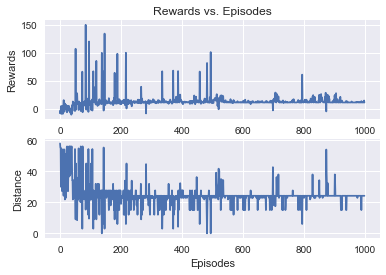

In [5]:
#plot the rewards and distace traveled towards the target per episode
#images/rewards_distance_plot.png  with lr = 0.01 and discount = 0.80
plt.figure(1)
plt.subplot(211)
plt.plot(rewards)
plt.ylabel('Rewards')
plt.xlabel('Episodes')
plt.title('Rewards vs. Episodes')
plt.subplot(212)
plt.plot(end_dis)
plt.ylabel('Distance')
plt.xlabel('Episodes')
#plt.title('Distance vs. Episodes')
plt.savefig('images/rewards_distance_plot_1.png')
plt.show()

In [6]:
sum(end_dis)/len(end_dis)

24.596119187122973

In [7]:
#plot the leabled and unleabled dataset to see the distribution of datapoints on the grid
l_ul_df =  pd.read_csv('datasets/state_formatted_target_17_10.csv')

# full_grid = np.load('grids/objects_grid.npy')
# for i in range(0,l_ul_df.shape[0]):
#     full_grid[l_ul_df.iat[i,13],l_ul_df.iat[i,14]] += 1

# f, ax = plt.subplots(figsize=(10, 7))
# sns.heatmap(full_grid, annot=True, fmt="g", cmap='viridis', ax=ax)
# plt.show()


In [25]:
#create a dataframe that has distance of each iBeacon from target position for a given datapoint in the 
#combined dataframe along with the row column and distance columns to match the state format for RL learning

col_nms = ['dis_' + str(i) for i in range(1, 14)]
l_ul_dis_df = DataFrame( columns = col_nms)
dis_ph = []

for j in range(0,13):
    for i in range(0,l_ul_df.shape[0]):
        #Distace is multiplier by three due to the fact that each grid cell is approx. 3m by 3m
        dis_ph.append(3 * distance.euclidean(np.array([l_ul_df.iat[i,14],l_ul_df.iat[i,13]]), b_loc[j]))
    l_ul_dis_df['dis_' + str(j+1)] = pd.DataFrame({ col_nms[j]: dis_ph})
    dis_ph.clear()
l_ul_dis_df['row'] = l_ul_df['row']
l_ul_dis_df['col'] = l_ul_df['col']
l_ul_dis_df['distance'] = l_ul_df['distance']
l_ul_dis_df.head()

,dis_1,dis_2,dis_3,dis_4,dis_5,dis_6,dis_7,dis_8,dis_9,dis_10,dis_11,dis_12,dis_13,row,col,distance
0,31.890437,37.947332,36.000000,39.000000,29.546573,27.000000,30.886890,21.633308,30.149627,12.369317,3.000000,15.297059,27.166155,15,13,10.816654
1,18.973666,10.816654,10.816654,22.847319,6.000000,6.000000,21.000000,10.816654,33.941125,24.738634,24.738634,31.890437,40.804412,6,11,33.136083
2,30.886890,15.000000,3.000000,12.000000,17.492856,9.486833,15.000000,23.430749,46.669048,36.249138,33.136083,35.114100,40.804412,3,14,43.680659
3,28.301943,32.310989,30.000000,33.541020,24.186773,21.000000,25.806976,16.970563,30.149627,12.369317,3.000000,15.297059,27.166155,13,13,15.000000
4,21.633308,3.000000,12.369317,27.166155,12.000000,16.970563,29.546573,21.000000,40.249224,36.000000,37.947332,45.000000,53.075418,2,9,45.099889


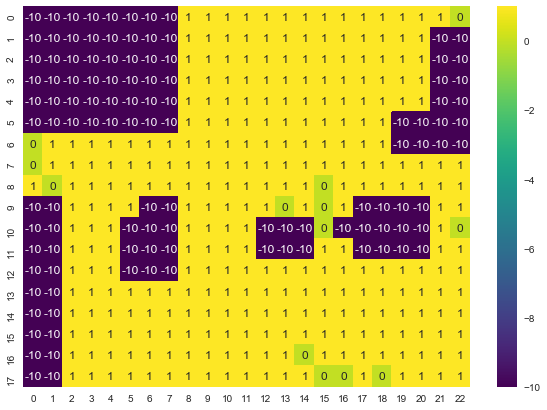

In [31]:
#remove any redundant datapoints on a given grid and plot the grid to see which grid locations have datapoints
l_ul_dis_df = l_ul_dis_df.drop_duplicates()#subset = ['row','col']
l_ul_dis_df.shape
full_grid = np.load('grids/objects_grid.npy')
for i in range(0,l_ul_dis_df.shape[0]):
    full_grid[l_ul_dis_df.iat[i,13],l_ul_dis_df.iat[i,14]] += 1

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(full_grid, annot=True, fmt="g", cmap='viridis', ax=ax)
plt.show()
l_ul_dis_df.to_csv('datasets/state_formatted_distance_target_17_10.csv', index=False)

In [4]:
from agent import Agent
from task import Task

#load the datafiles  
l_ul_dis_df=  pd.read_csv('datasets/state_formatted_distance_target_17_10.csv')
grid_file = 'grids/objects_grid.npy'
iBeacon_loc = 'grids/iBeacon_locations_col_row.npy'
labeled_data = 'datasets/state_formatted_distance_target_17_10.csv'#'datasets/BLE_col_row.csv'#
#instantiate the task
task = Task(grid_file=grid_file, iBeacon_loc=iBeacon_loc, labeled_data=labeled_data, target_pos=target_loc )
#instantiate the agent
agent = Agent(task)
#instantiate the local variables
n_episode = 1000
rewards = []
steps = []
list3 = []
end_dis = []
#E-greedy policy parameters
e = 1
decay_factor = 0.995

for episode in range(1, n_episode):
    #for instance in range(0, l_ul_df.shape[0]):
        state = agent.reset_episode()
     #   for j in range (0, 16):
     #       list3.append(l_ul_df.iat[instance, j])
     #   state = np.array(list3)
     #   list3.clear()
        e *= decay_factor
        while True:
            y = np.random.rand(1)<np.array([e])
            if y[0]:
                action = np.random.randint(0,4)
            else:
                action = agent.act(state)
            next_state, reward, done = task.step(action)
            agent.step(action,reward,next_state,done)
            state = next_state
            if done:
                rewards.append(task.score)
                steps.append(agent.steps)
                end_dis.append(task.dis_to_target)
                #print("\nActions = {} ".format(actions), end="")
                print("\rEpisode = {:4d}, score = {:7.3f}, best score = {:7.3f}, steps = {},  final distance = {:7.3f}, init distance = {:7.3f}"
                      .format(episode, task.score, task.best_score, agent.steps, task.dis_to_target, task.init_dis), end="")
                break       
        sys.stdout.flush()
        agent.VAE_act.model.save('model_weights/weights.trainedagent_2.h5')

Episode =  999, score =  11.494, best score = 153.192, steps = 8,  final distance =  24.187, init distance =  46.5733

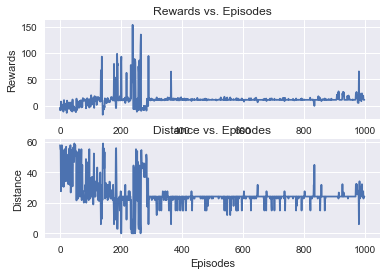

In [5]:
#plot the rewards and distace traveled towards the target per episode
#images/rewards_distance_plot.png  with lr = 0.01 and discount = 0.80
plt.figure(1)
plt.subplot(211)
plt.plot(rewards)
plt.ylabel('Rewards')
plt.xlabel('Episodes')
plt.title('Rewards vs. Episodes')
plt.subplot(212)
plt.plot(end_dis)
plt.ylabel('Distance')
plt.xlabel('Episodes')
plt.title('Distance vs. Episodes')
plt.savefig('images/rewards_distance_plot_1.png')
plt.show()

In [36]:
l_df = pd.read_csv('datasets/BLE_col_row.csv')
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
b3001    1420 non-null float64
b3002    1420 non-null float64
b3003    1420 non-null float64
b3004    1420 non-null float64
b3005    1420 non-null float64
b3006    1420 non-null float64
b3007    1420 non-null float64
b3008    1420 non-null float64
b3009    1420 non-null float64
b3010    1420 non-null float64
b3011    1420 non-null float64
b3012    1420 non-null float64
b3013    1420 non-null float64
col      1420 non-null int64
row      1420 non-null int64
dtypes: float64(13), int64(2)
memory usage: 166.5 KB


In [49]:
#prepare a dataset using only labeled data to train the RL agent
#the dataset contains the distance of the thirteen iBeacons from a given data point
#along with rows, columns and distance from the target point
col_nms = ['dis_' + str(i) for i in range(1, 14)]
l_dis_df = DataFrame( columns = col_nms)
dis_ph = []

for j in range(0,13):
    for i in range(0,l_df.shape[0]):
        #Distace is multiplier by three due to the fact that each grid cell is approx. 3m by 3m
        dis_ph.append(3 * distance.euclidean(np.array([l_df.iat[i,14],l_df.iat[i,13]]), b_loc[j]))
    l_dis_df['dis_' + str(j+1)] = pd.DataFrame({ col_nms[j]: dis_ph})
    dis_ph.clear()
l_dis_df['row'] = l_df['row']
l_dis_df['col'] = l_df['col']
dist = []
temp = []

for i in range(0,l_df.shape[0]):
    for j in range (13, 15):
        temp.append(l_df.iat[i, j])
    y = np.array(temp)
    temp.clear()
    dist.append((3 * distance.euclidean(y, target_loc)))
l_dis_df['distance'] = pd.DataFrame({ 'distance': dist})
l_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 16 columns):
dis_1       1420 non-null float64
dis_2       1420 non-null float64
dis_3       1420 non-null float64
dis_4       1420 non-null float64
dis_5       1420 non-null float64
dis_6       1420 non-null float64
dis_7       1420 non-null float64
dis_8       1420 non-null float64
dis_9       1420 non-null float64
dis_10      1420 non-null float64
dis_11      1420 non-null float64
dis_12      1420 non-null float64
dis_13      1420 non-null float64
row         1420 non-null int64
col         1420 non-null int64
distance    1420 non-null float64
dtypes: float64(14), int64(2)
memory usage: 177.6 KB


In [50]:
#remove redundant points from the dataset
l_dis_df = l_dis_df.drop_duplicates(subset = ['row','col'])#
l_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 1342
Data columns (total 16 columns):
dis_1       105 non-null float64
dis_2       105 non-null float64
dis_3       105 non-null float64
dis_4       105 non-null float64
dis_5       105 non-null float64
dis_6       105 non-null float64
dis_7       105 non-null float64
dis_8       105 non-null float64
dis_9       105 non-null float64
dis_10      105 non-null float64
dis_11      105 non-null float64
dis_12      105 non-null float64
dis_13      105 non-null float64
row         105 non-null int64
col         105 non-null int64
distance    105 non-null float64
dtypes: float64(14), int64(2)
memory usage: 13.9 KB


In [51]:
l_dis_df.head()

,dis_1,dis_2,dis_3,dis_4,dis_5,dis_6,dis_7,dis_8,dis_9,dis_10,dis_11,dis_12,dis_13,row,col,distance
0,21.633308,40.804412,48.836462,60.745370,33.941125,43.266615,56.364883,28.301943,6.000000,24.000000,36.000000,51.000000,63.000000,1,14,28.460499
1,25.806976,45.000000,53.075418,64.899923,38.183766,47.434165,60.373835,32.449961,9.486833,27.166155,39.115214,54.083269,66.068147,0,15,30.594117
7,24.186773,43.266615,50.911688,62.425956,36.124784,45.000000,57.706152,30.000000,6.708204,24.186773,36.124784,51.088159,63.071388,1,15,27.658633
8,30.886890,49.929951,57.314920,68.410526,42.638011,51.088159,63.285069,36.124784,12.727922,28.460499,40.024992,54.744863,66.610810,0,17,30.000000
13,29.546573,48.373546,55.317267,66.068147,40.804412,48.836462,60.745370,33.941125,10.816654,25.632011,37.107951,51.788030,63.639610,1,17,27.000000


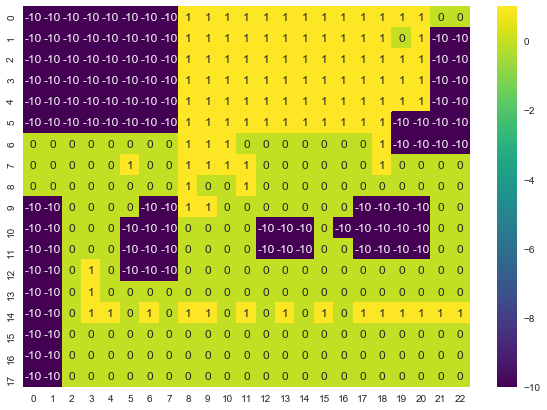

In [54]:
#plot the grid to see which grid locations have datapoints
full_grid = np.load('grids/objects_grid.npy')
for i in range(0,l_dis_df.shape[0]):
    full_grid[l_dis_df.iat[i,13],l_dis_df.iat[i,14]] += 1

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(full_grid, annot=True, fmt="g", cmap='viridis', ax=ax)
plt.show()
l_dis_df.to_csv('datasets/state_formatted_distance_target_17_10_labeled.csv', index=False)
np.save('grids/grid_labeled.npy',full_grid) 

In [3]:
#load all the data files
grid_file = 'grids/grid_labeled.npy'
iBeacon_loc = 'grids/iBeacon_locations_col_row.npy'
labeled_data = 'datasets/state_formatted_distance_target_17_10_labeled.csv'#'datasets/BLE_col_row.csv'#
#instantiate the task
task = Task(grid_file=grid_file, iBeacon_loc=iBeacon_loc, labeled_data=labeled_data, target_pos=target_loc )
#instantiate the agent
agent = Agent(task)
#instantiate the local variables
n_episode = 1000
rewards = []
steps = []
list3 = []
end_dis = []
#instantiate e-greedy policy variables
e = 1
decay_factor = 0.995

for episode in range(1, n_episode):
    #for instance in range(0, l_ul_df.shape[0]):
        state = agent.reset_episode()
     #   for j in range (0, 16):
     #       list3.append(l_ul_df.iat[instance, j])
     #   state = np.array(list3)
     #   list3.clear()
        e *= decay_factor
        while True:
            y = np.random.rand(1)<np.array([e])
            if y[0]:
                action = np.random.randint(0,4)
            else:
                action = agent.act(state)
            next_state, reward, done = task.step(action)
            agent.step(action,reward,next_state,done)
            state = next_state
            if done:
                rewards.append(task.score)
                steps.append(agent.steps)
                end_dis.append(task.dis_to_target)
                #print("\nActions = {} ".format(actions), end="")
                print("\rEpisode = {:4d}, score = {:7.3f}, best score = {:7.3f}, steps = {},  final distance = {:7.3f}, init distance = {:7.3f}"
                      .format(episode, task.score, task.best_score, agent.steps, task.dis_to_target, task.init_dis), end="")
                break       
        sys.stdout.flush()
        agent.VAE_act.model.save('model_weights/weights.trainedagent_3.h5')

Episode =  999, score =  23.437, best score =  27.410, steps = 51,  final distance =  37.947, init distance =  46.573

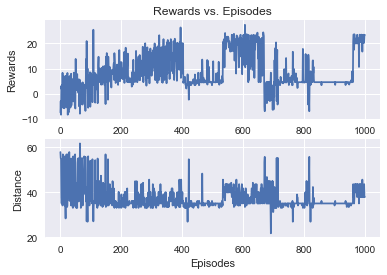

In [5]:
#plot the rewards and distace traveled towards the target per episode
#images/rewards_distance_plot.png  with lr = 0.01 and discount = 0.80
plt.figure(1)
plt.subplot(211)
plt.plot(rewards)
plt.ylabel('Rewards')
plt.xlabel('Episodes')
plt.title('Rewards vs. Episodes')
plt.subplot(212)
plt.plot(end_dis)
plt.ylabel('Distance')
plt.xlabel('Episodes')
#plt.title('Distance vs. Episodes')
plt.savefig('images/rewards_distance_plot_labeled.png')
plt.show()